#**Intern - Maikandan Murugan**

### **AIM :** Predict the score obtained by a student based on the number of study hours.

**Data source** : http://bit.ly/w-data

##**Importing the Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

##**Gathering Data**

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##**Exploring the data**

In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##**Prepare the data**

In [5]:
#We are extracting value of hour data into variable X and value of scored data into variable y

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [6]:
#Hours studied

X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
#scored

y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

##**Visualyse and Analyse the Data**

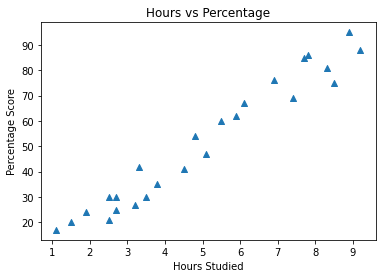

In [8]:
plt.scatter(X, y, marker='^')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##**Spliting the data into train and test data**

####train dataset : Used to train the model.

####test dataset : Used to evaluate the trained model.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888) 

##**Train the Machine Learning Model**

In [10]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print("Training complete")

Training complete


In [11]:
regr.coef_

array([9.63967269])

In [12]:
regr.intercept_

3.050280717444231

##**Plotting the Regression Line**

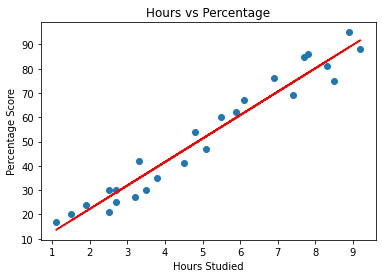

In [13]:
slope = regr.coef_ * X + regr.intercept_

plt.scatter(X, y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.plot(X, slope, color='red');
plt.show()

###**Make Prediction**

In [14]:
y_pred = regr.predict(X_test) # Predicting the scores

In [15]:
#Comparing  between actual and predicted model

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.509790
1,85,77.275760
2,54,49.320710
3,47,52.212611
4,30,36.789135


####**Problem Statement :** What will be the predicted score if the student studies for 9.25 hours/day?

In [16]:
hours = 9.25
own_pred = regr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.21725313490106


##**Evaluate the model**

In [17]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.379097347229709
